In [213]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def mapper(system_name, exp, frac, mappings_dir, log=False, symlog=False, add=False, sub=False, mul=False, div=False, point_size=1):
    if log and symlog:
        print("Error: Cannot use both 'log' and 'symlog' flags simultaneously. Please specify only one scaling method.")
        return

    operator_flags = {"+": add, "-": sub, "*": mul, "/": div}
    
    color_mapping = {
        "Correct": "green",
        "NAR": "black",
        "Overflow": "red",
        "Underflow": "purple"
    }

    try:
        graphs = {}
        with open(mappings_dir, 'r') as file:
            lines = file.readlines()

        current_operand = None
        data = []

        for line in lines:
            line = line.strip()
            if line.startswith("Generate '"):
                if current_operand and data:
                    graphs[current_operand] = pd.DataFrame(data, columns=["Result", "Value 1", "Operand", "Value 2", "Output", "Float(64) Value"])
                current_operand = line.split("'")[1]
                if not operator_flags.get(current_operand, False):
                    current_operand = None
                    continue
                data = []
                continue
            
            if not line or "Result" in line:
                continue

            parts = line.split(',')
            if len(parts) != 6:
                continue
            data.append(parts)

        if current_operand and data:
            graphs[current_operand] = pd.DataFrame(data, columns=["Result", "Value 1", "Operand", "Value 2", "Output", "Float(64) Value"])

        for operand, df in graphs.items():
            if not operator_flags[operand]:  
                continue

            df["Value 1"] = pd.to_numeric(df["Value 1"], errors="coerce")
            df["Value 2"] = pd.to_numeric(df["Value 2"], errors="coerce")
            df = df.dropna(subset=["Value 1", "Value 2"])
            colors = df["Result"].map(color_mapping).fillna('yellow')

            plt.figure(figsize=(6, 6))
            plt.scatter(df["Value 1"], df["Value 2"], c=colors, s=point_size)
            plt.xlabel("Value 1")
            plt.ylabel("Value 2")
            plt.title(f"Operation: {operand}")
            plt.figtext(0.5, 0.01, system_name, ha="center", fontsize=10)
            
            if log:
                plt.xscale("log")
                plt.yscale("log")
            elif symlog:
                linthresh = 1e-5  # Adjust based on your data
                plt.xscale("symlog", linthresh=linthresh)
                plt.yscale("symlog", linthresh=linthresh)
                
                # Get default tick locations
                x_ticks = plt.gca().get_xticks()
                y_ticks = plt.gca().get_yticks()
                
                # Select first, origin (0), and last tick
                x_ticks_reduced = [x_ticks[0], 0, x_ticks[-1]]  # First, 0, last
                y_ticks_reduced = [y_ticks[0], 0, y_ticks[-1]]
                
                # Set reduced ticks with rotation
                plt.xticks(x_ticks_reduced)
                plt.yticks(y_ticks_reduced)

            plt.tight_layout(rect=[0, 0.1, 1, 1])  # Left, bottom, right, top
            plt.show()

    except FileNotFoundError:
        print(f"Error: Could not find file at: {mappings_dir}")
    except Exception as e:
        print(f"Error: {e}")

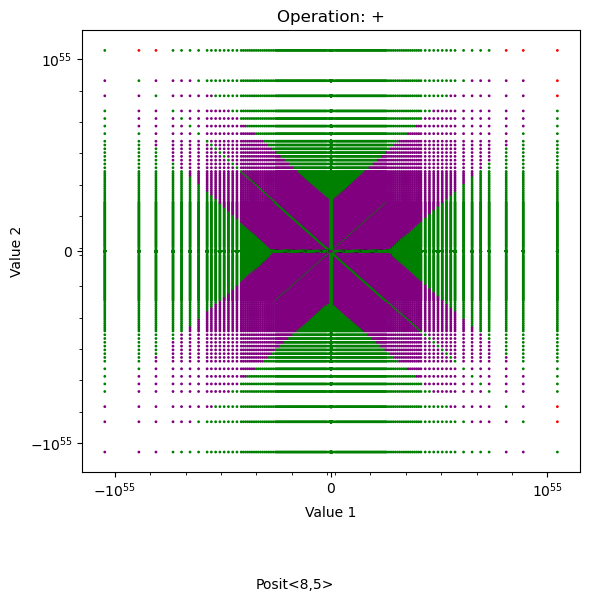

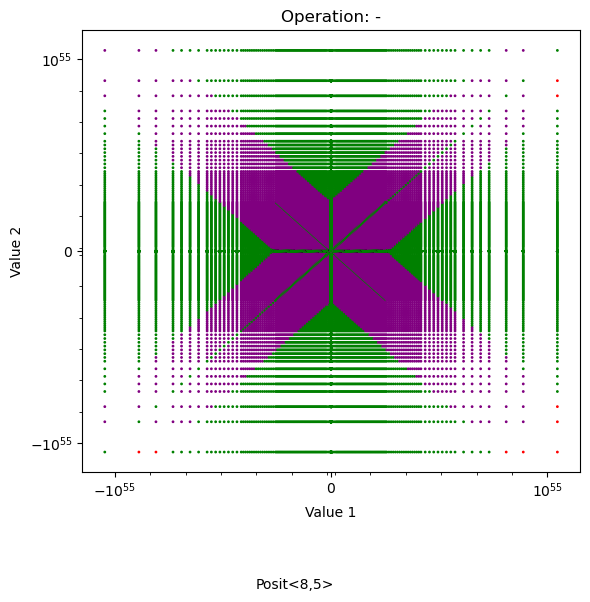

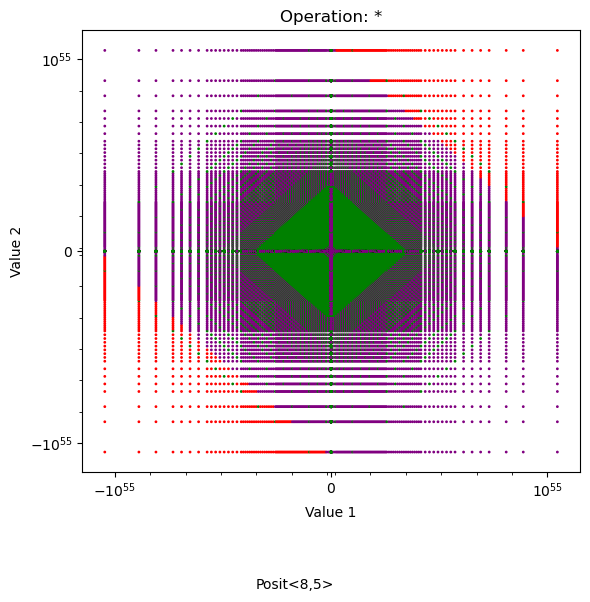

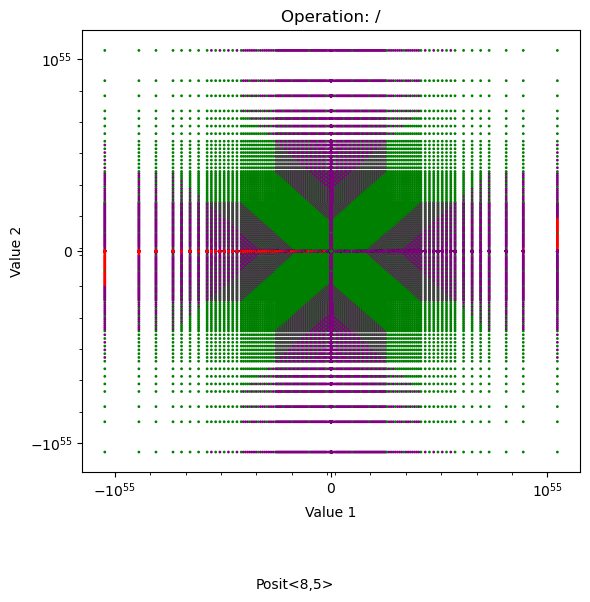

In [214]:
"""
Key:

"Correct": "green",
"Overflow": "red",
"Underflow": "purple"
"NAR": "black",
"Unknown": "yellow" - This should not happen.

"""        



EXP = 8
FRAC = 5

ADD=True
SUB=True
MUL=True
DIV=True

POINT_SIZE = 1
LOG = False
SYMLOG = True

system_name = f"Posit<{EXP},{FRAC}>"
file_dir = "/Users/colby/Desktop/universal/build/mappings/csv_mappings"
mappings_dir = os.path.join(file_dir, f"{system_name}.csv")


mapper(system_name, EXP, FRAC, mappings_dir, point_size=POINT_SIZE, log=LOG, symlog = SYMLOG, add=ADD, sub=SUB, mul=MUL, div=DIV)